In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
fig_dir = 'figures'

In [106]:
def make_boxplots(algorithm):
    metrics = ['AUC_ROC', 'Precision', 'Recall', 'F']

    # create subplots for each metric
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
    # fig.suptitle(f'Boxplots for Evaluation Metrics for {algorithm}')

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        # Load the CSV file into a DataFrame
        df = pd.read_csv(f'comparison/mergedTable_{metric}.csv')

        # Create a dictionary to store performance values for each dataset
        data_to_plot = {}
        for dataset, group in df.groupby('dataset'):
            data_to_plot[dataset] = group[algorithm].values

        # Create a list of datasets and corresponding performance values
        datasets = list(data_to_plot.keys())
        values = list(data_to_plot.values())

        axes[row, col].boxplot(values, labels=datasets)
        axes[row, col].set_title(metric)

        # Rotate x-axis labels for better readability
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'{fig_dir}/performance_{algorithm}_perdataset.pdf')
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'figures/performance_LSTMAE_unc_perdataset.pdf'

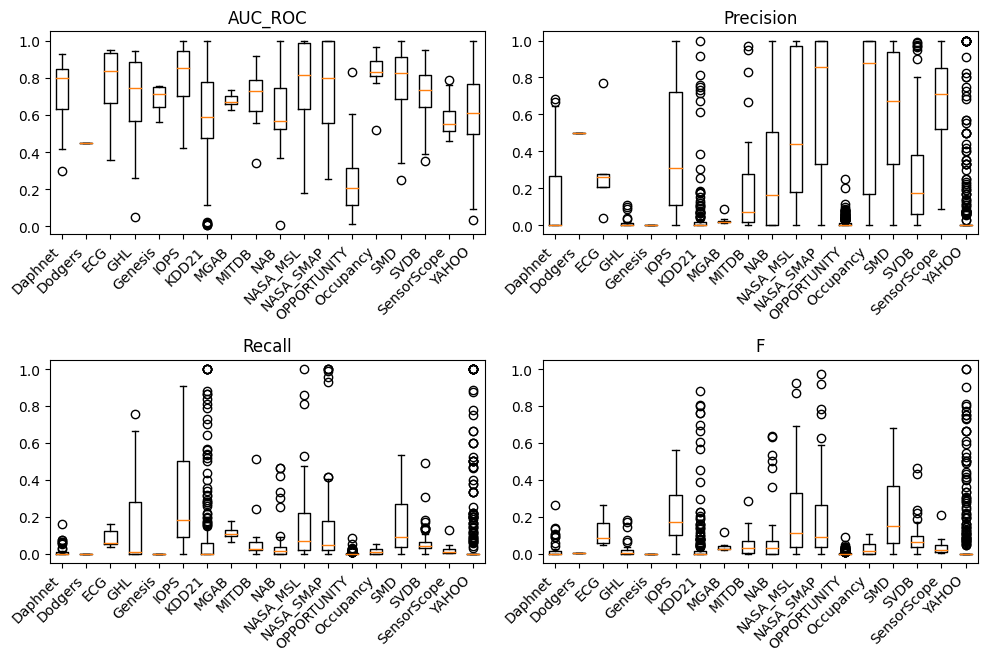

In [107]:
# make_boxplots('AE')
# make_boxplots('AE_unc')
# make_boxplots('LSTMAE')
make_boxplots('LSTMAE_unc')
# make_boxplots('IFOREST')

In [92]:
df = pd.read_csv(f'comparison/mergedTable_F.csv')
df = df[['dataset', 'IFOREST', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM', 'PCA', 'CNN', 'LSTM', 'POLY',
         'AE', 'AE', 'LSTMAE', 'LSTMAE_unc']]
df = df.groupby('dataset').mean()
df

,IFOREST,MP,NORMA,IFOREST1,HBOS,OCSVM,PCA,CNN,LSTM,POLY,AE,AE,LSTMAE,LSTMAE_unc
dataset,,,,,,,,,,,,,,
Daphnet,0.060643,0.009139,0.021903,0.080641,0.062919,0.006200,0.075250,0.016233,0.017737,0.070375,0.044175,0.044175,0.029635,0.024360
Dodgers,0.141870,0.190238,0.188209,0.021381,0.010361,0.061004,0.262996,0.038906,0.033355,0.082876,0.063007,0.063007,0.051389,0.000356
ECG,0.272388,0.119337,0.385374,0.178600,0.199204,0.171148,0.256817,0.043337,0.038130,0.172121,0.068801,0.068801,0.068801,0.123681
GHL,0.068756,0.011433,0.013991,0.069824,0.078671,0.018834,0.034227,0.000000,0.000000,0.015350,0.009194,0.009194,0.013397,0.011489
Genesis,0.039338,0.000000,0.014695,0.166345,0.005512,0.033178,0.067482,0.009677,0.008453,0.116809,0.070173,0.070173,0.052460,0.000000
IOPS,0.127777,0.084438,0.095742,0.292414,0.069113,0.052587,0.139344,0.156750,0.154894,0.298745,0.163969,0.163969,0.218917,0.210890
KDD21,0.097601,0.246062,0.241739,0.019575,0.064844,0.162561,0.088506,0.090827,0.039755,0.041927,0.068266,0.068266,0.067643,0.047309
MGAB,0.000000,0.225731,0.003011,0.003929,0.002032,0.002412,0.001984,0.025865,0.027914,0.005425,0.090841,0.090841,0.007859,0.038052
MITDB,0.092637,0.112623,0.201763,0.062953,0.074052,0.136325,0.088063,0.037775,0.022942,0.054668,0.048965,0.048965,0.046799,0.050963


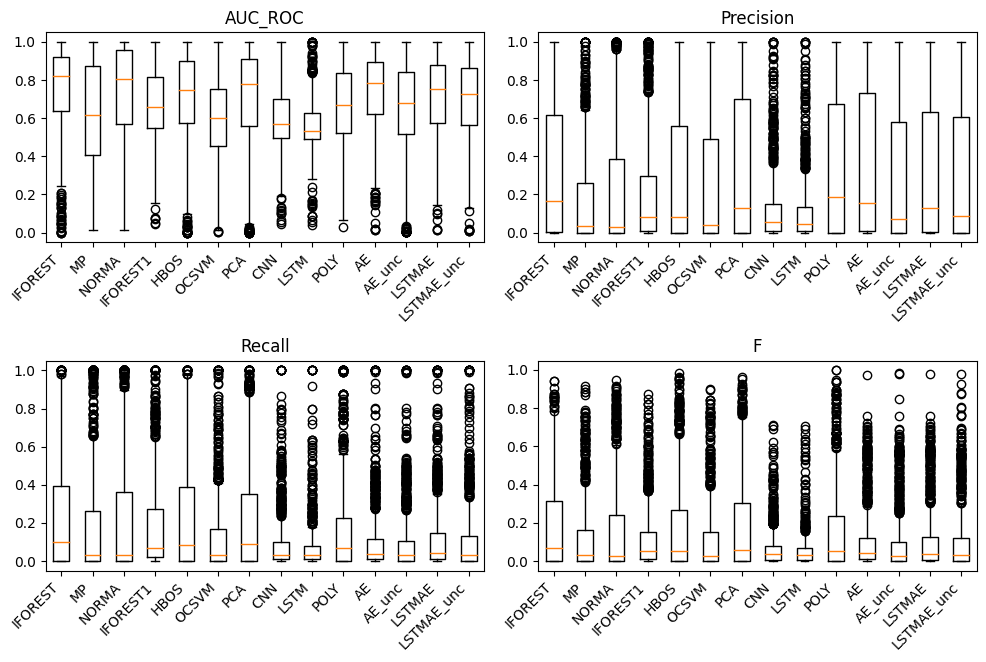

In [126]:
metrics = ['AUC_ROC', 'Precision', 'Recall', 'F']
algorithms = ['IFOREST', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM', 'PCA', 'CNN', 'LSTM', 'POLY',
         'AE', 'AE_unc', 'LSTMAE', 'LSTMAE_unc']

# create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
# fig.suptitle('Boxplots for Evaluation Metrics by Algorithm')

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    # Load the CSV file into a DataFrame
    df = pd.read_csv(f'comparison/mergedTable_{metric}.csv')

    # drop rows with value of dataset column equal to 'OPPORTUNITY'
    df = df[df['dataset'] != 'OPPORTUNITY']
    df = df[df['dataset'] != 'YAHOO']

    # Drop rows with missing values
    df = df.dropna(subset=algorithms)

    axes[row, col].boxplot(df[algorithms].values, labels=algorithms)
    axes[row, col].set_title(metric)

    # Rotate x-axis labels for better readability
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('performance_all_algorithms.pdf')
plt.show()

In [124]:
def make_boxplots_per_anomaly_type(algorithm):    
    metrics = ['AUC_ROC', 'Precision', 'Recall', 'F']
    
    # create subplots for each metric
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    # fig.suptitle(f'Boxplots for Evaluation Metrics for {algorithm}')
    
    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        # Load the CSV file into a DataFrame
        df = pd.read_csv(f'comparison/mergedTable_{metric}.csv')
    
        # Keep only rows with value of dataset column equal to 'YAHOO'
        # df = df[df['dataset'] != 'YAHOO']
        # df = df[df['dataset'] != 'OPPORTUNITY']
    
        # Modify rows based on conditions
        df.loc[(df['type_an'] == 'sequence') & (df['average_anom_length'] > 10), 'type_an'] = 'sequence (long)'
        df.loc[(df['type_an'] == 'sequence') & (df['average_anom_length'] <= 10), 'type_an'] = 'sequence (short)'
    
        # Create a dictionary to store performance values for each dataset
        data_to_plot = {}
        for type_an, group in df.groupby('type_an'):
            data_to_plot[type_an] = group[algorithm].values
    
        # Create a list of datasets and corresponding performance values
        datasets = list(data_to_plot.keys())
        values = list(data_to_plot.values())
    
        axes[row, col].boxplot(values, labels=datasets)
        axes[row, col].set_title(metric)
    
        # Rotate x-axis labels for better readability
        axes[row, col].set_xticklabels(axes[row, col].get_xticklabels())
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'performance_{algorithm}_per_anomaly_type.pdf')
    plt.show()

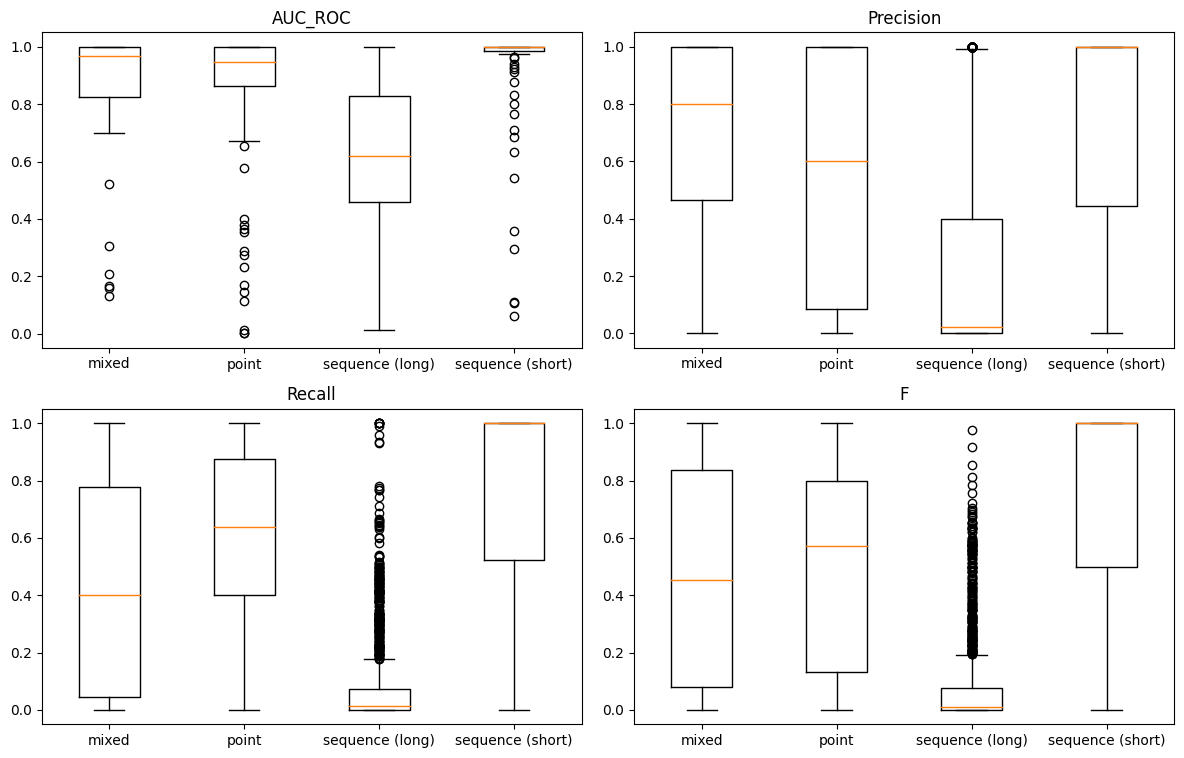

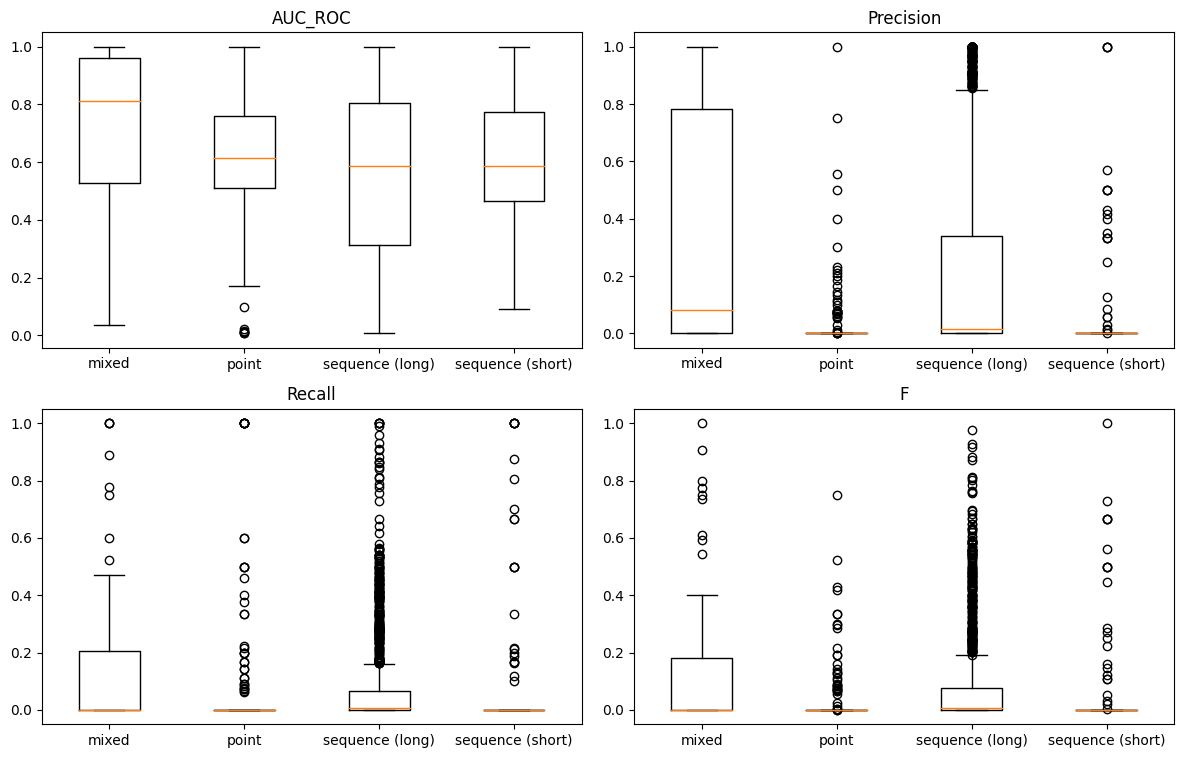

In [125]:
make_boxplots_per_anomaly_type('LSTMAE')
make_boxplots_per_anomaly_type('LSTMAE_unc')

In [62]:
df['type_an'].value_counts()

type_an
sequence (long)     1019
point                 17
mixed                 11
sequence (short)      11
Name: count, dtype: int64

In [57]:
df = pd.read_csv(f'comparison/mergedTable_AUC_ROC.csv')

# Modify rows based on conditions (if not already done)
df.loc[(df['type_an'] == 'sequence') & (df['average_anom_length'] > 10), 'type_an'] = 'long sequence'
df.loc[(df['type_an'] == 'sequence') & (df['average_anom_length'] <= 10), 'type_an'] = 'short sequence'

# Count the frequency of each unique entry in the 'type_an' column per 'dataset'
overview = df.groupby(['dataset', 'type_an']).size().unstack(fill_value=0)

# Display the overview
overview

type_an,long sequence,mixed,point,short sequence
dataset,,,,
Daphnet,45,0,0,0
Dodgers,0,1,0,0
ECG,5,0,0,0
GHL,125,0,0,0
Genesis,6,0,0,0
IOPS,25,0,0,4
KDD21,223,0,17,7
MGAB,10,0,0,0
MITDB,32,0,0,0
